<a href="https://colab.research.google.com/github/tsunufu/emotionJudgment/blob/main/emotionJudgement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import glob
import librosa
import matplotlib.pyplot as plt
import seaborn as sns

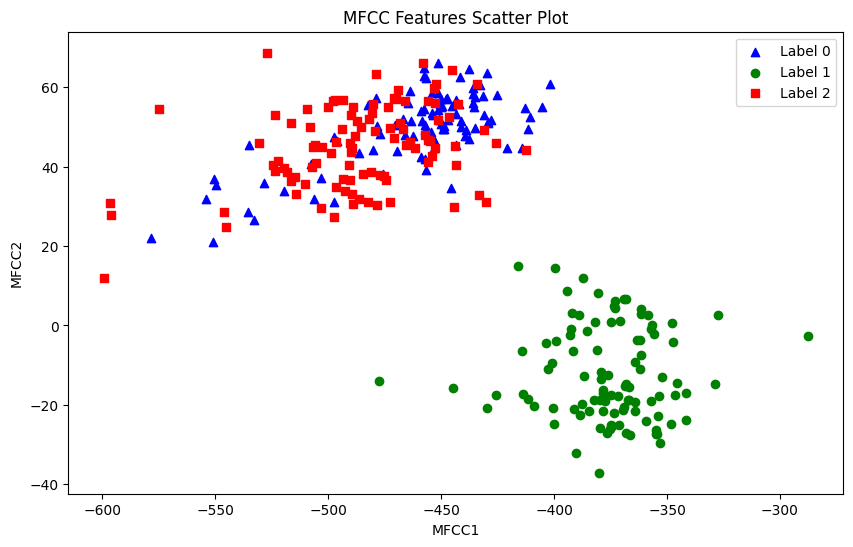

In [2]:
def get_label(path): #感情ラベルを数値に変換
    label_name = path.split("/")[-1].split("_")[1] #ファイル名から感情を取得
    if label_name == "normal":
        label = 0
    elif label_name == "happy":
        label = 1
    elif label_name == "angry":
        label = 2
    else: #想定外の値用
        label = -1
    return label

paths = glob.glob("drive/MyDrive/onkyo/*/*.wav") #音声ファイルのパスを取得
feature_list = [] #音響的な特徴を格納するリスト
label_list = [] #正解データを格納するリスト
for path in paths:
    y, sr = librosa.load(path, sr=16000) #音声ファイルの読み込み
    mfcc = librosa.feature.mfcc(y=y,sr=sr,n_mfcc=13) #MFCCを取得
    feature_list.append(np.mean(mfcc, axis=1))#各次元の平均を取得
    label = get_label(path)
    label_list.append(label)

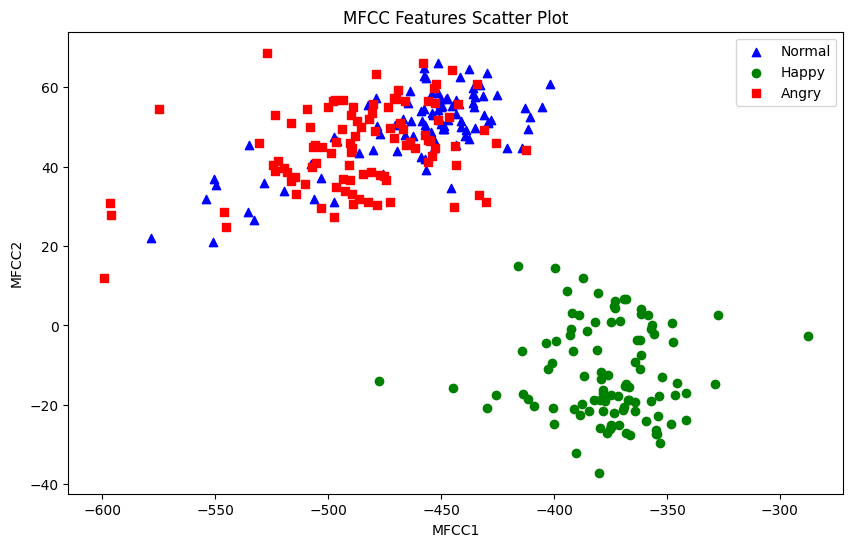

In [30]:
features = np.array(feature_list)
labels = np.array(label_list)

# 感情名をラベルインデックスに対応させる
emotions = ['Normal', 'Happy', 'Angry']

plt.figure(figsize=(10, 6))
for label, marker, color in zip(range(3), ('^', 'o', 's'), ('blue', 'green', 'red')):
    plt.scatter(features[labels == label, 0], features[labels == label, 1], marker=marker, color=color, label=f'{emotions[label]}')
plt.title('MFCC Features Scatter Plot')
plt.xlabel('MFCC1')
plt.ylabel('MFCC2')
plt.legend()
plt.show()

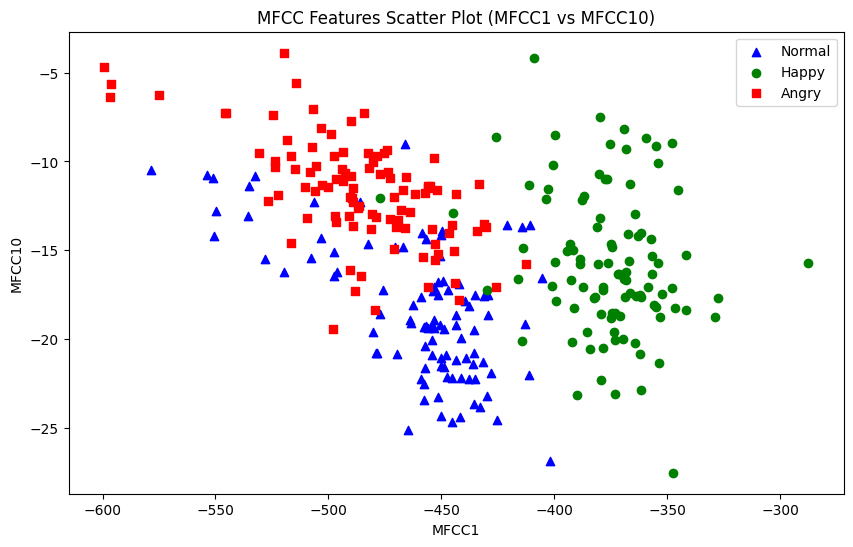

In [32]:
features = np.array(feature_list)
labels = np.array(label_list)

# 感情名をラベルインデックスに対応させる
emotions = ['Normal', 'Happy', 'Angry']

plt.figure(figsize=(10, 6))
# 各ラベルごとに異なるマーカーと色で散布図を描画
for label, marker, color in zip(range(3), ('^', 'o', 's'), ('blue', 'green', 'red')):
    plt.scatter(features[labels == label, 0], features[labels == label, 9], marker=marker, color=color, label=f'{emotions[label]}')
plt.title('MFCC Features Scatter Plot (MFCC1 vs MFCC10)')
plt.xlabel('MFCC1')  # 1次元目
plt.ylabel('MFCC10')  # 9次元目をプロット
plt.legend()
plt.show()


学習データとテストデータの分割

In [9]:
from sklearn.model_selection import train_test_split
Y_train, Y_test, X_train, X_test = train_test_split(label_list, feature_list, test_size=0.3)


前処理として標準化

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)


標準化したものを再度グラフ化して確認

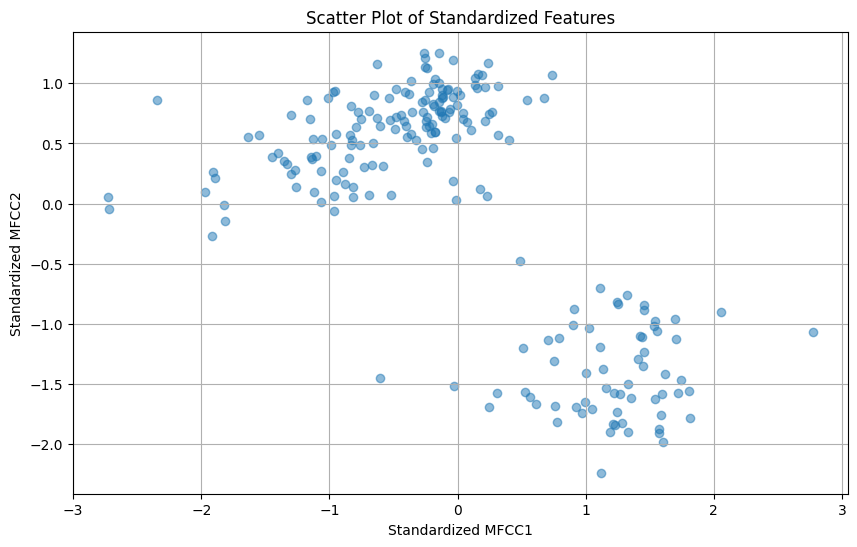

In [12]:

plt.figure(figsize=(10, 6))
plt.scatter(X_train_std[:, 0], X_train_std[:, 1], alpha=0.5)
plt.title('Scatter Plot of Standardized Features')
plt.xlabel('Standardized MFCC1')
plt.ylabel('Standardized MFCC2')
plt.grid(True)
plt.show()

学習

In [ ]:
from sklearn.svm import LinearSVC
svm = LinearSVC()
svm.fit(X_train_std, Y_train)


LinearSVC()

感情認識モデルの評価

In [ ]:
from sklearn.metrics import accuracy_score

Y_pred_train = svm.predict(X_train_std)
Y_pred_test = svm.predict(X_test_std)
train_accuracy = accuracy_score(Y_train, Y_pred_train)
test_accuracy = accuracy_score(Y_test, Y_pred_test)
print("Train accuracy: {}%, Test accuracy: {}%".format(train_accuracy, test_accuracy))


Train accuracy: 1.0%, Test accuracy: 0.9555555555555556%


混同行列

Text(0.5, 1.0, 'Emotion Prediction Result')

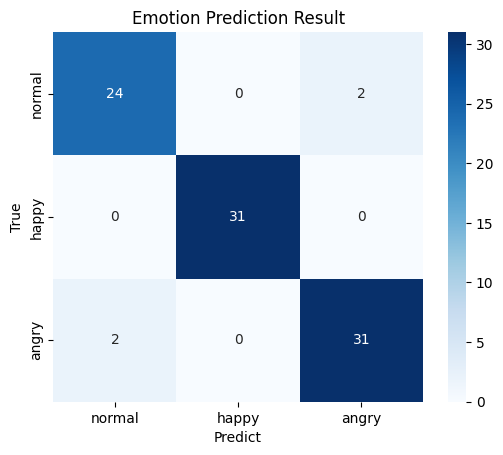

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

cm = confusion_matrix(Y_test, Y_pred_test)
cm = pd.DataFrame(data=cm, index=["normal", "happy", "angry"], columns=["normal", "happy", "angry"])
sns.heatmap(cm, square=True, cbar=True, annot=True, cmap='Blues')
plt.xlabel("Predict")
plt.ylabel("True")
plt.title("Emotion Prediction Result")
